In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('cpdata.csv')
data

,temperature,humidity,ph,rainfall,N,P,K,label
0,20.879744,82.002744,6.502985,202.935536,0.7,0.1,0.8,rice
1,21.770462,80.319644,7.038096,226.655537,0.5,0.7,0.4,rice
2,23.004459,82.320763,7.840207,263.964248,0.7,0.6,0.1,rice
3,26.491096,80.158363,6.980401,242.864034,0.8,0.1,0.7,rice
4,20.130175,81.604873,7.628473,262.717340,0.5,0.8,0.2,rice
...,...,...,...,...,...,...,...,...
3095,25.287846,89.636679,6.765095,58.286977,0.1,0.8,0.5,watermelon
3096,26.638386,84.695469,6.189214,48.324286,0.5,0.1,0.5,watermelon
3097,25.331045,84.305338,6.904242,41.532187,0.8,0.7,0.6,watermelon
3098,26.897502,83.892415,6.463271,43.971937,0.5,0.8,0.3,watermelon


In [5]:
data.isnull().sum()
data.shape

(3100, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  3100 non-null   float64
 1   humidity     3100 non-null   float64
 2   ph           3100 non-null   float64
 3   rainfall     3100 non-null   float64
 4   N            3100 non-null   float64
 5   P            3100 non-null   float64
 6   K            3100 non-null   float64
 7   label        3100 non-null   object 
dtypes: float64(7), object(1)
memory usage: 193.9+ KB


In [7]:
data.describe()

,temperature,humidity,ph,rainfall,N,P,K
count,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000
mean,27.108466,66.005312,6.368913,110.213031,0.551710,0.550452,0.554419
std,7.566308,24.007713,0.809477,64.048562,0.208825,0.202875,0.209372
min,8.825675,10.034048,3.504752,20.211267,0.100000,0.100000,0.100000
25%,22.810495,55.244920,5.895343,64.909095,0.400000,0.475000,0.500000
50%,26.102848,68.980529,6.342518,97.057093,0.600000,0.600000,0.600000
75%,29.365644,84.446524,6.841616,141.210784,0.700000,0.700000,0.700000
max,54.986760,99.981876,9.935091,397.315380,0.800000,0.800000,0.800000


/tmp/ipython-input-3027845268.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,y='label',palette='Set2')


<function matplotlib.pyplot.show(close=None, block=None)>

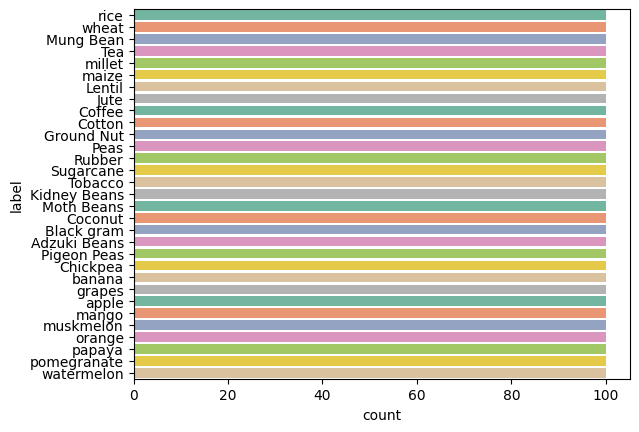

In [8]:
sns.countplot(data=data,y='label',palette='Set2')
plt.xticks(rotation=0)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

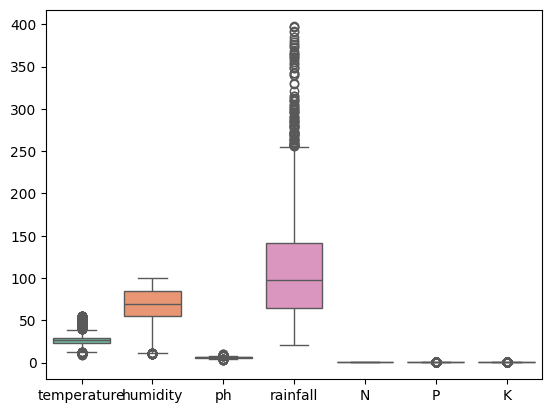

In [9]:
sns.boxplot(data=data,palette='Set2')
plt.xticks(rotation=0)
plt.show

In [10]:
data


,temperature,humidity,ph,rainfall,N,P,K,label
0,20.879744,82.002744,6.502985,202.935536,0.7,0.1,0.8,rice
1,21.770462,80.319644,7.038096,226.655537,0.5,0.7,0.4,rice
2,23.004459,82.320763,7.840207,263.964248,0.7,0.6,0.1,rice
3,26.491096,80.158363,6.980401,242.864034,0.8,0.1,0.7,rice
4,20.130175,81.604873,7.628473,262.717340,0.5,0.8,0.2,rice
...,...,...,...,...,...,...,...,...
3095,25.287846,89.636679,6.765095,58.286977,0.1,0.8,0.5,watermelon
3096,26.638386,84.695469,6.189214,48.324286,0.5,0.1,0.5,watermelon
3097,25.331045,84.305338,6.904242,41.532187,0.8,0.7,0.6,watermelon
3098,26.897502,83.892415,6.463271,43.971937,0.5,0.8,0.3,watermelon


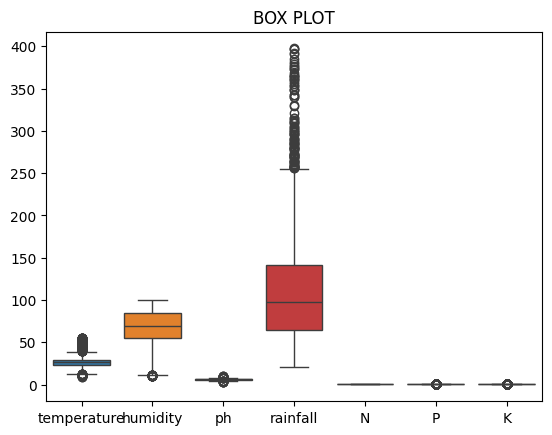

In [11]:
data=pd.read_csv('cpdata.csv')
data.drop('label',axis=1)
sns.boxplot(data)
plt.title("BOX PLOT")
plt.show()

In [12]:
data=pd.read_csv('cpdata.csv')
x=data.drop('label',axis=1)
y=data['label']

In [13]:
encoder=LabelEncoder()
y_encoded=encoder.fit_transform(y)

In [14]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y_encoded,test_size=0.2,random_state=0)
print("80% TRAINED DATA IS : ",xtrain.shape)
print("20% TEST DATA IS : ",xtest.shape)
print("80% TRAINED DATA IS : ",ytrain.shape)
print("20% TEST DATA IS : ",ytest.shape)

80% TRAINED DATA IS :  (2480, 7)
20% TEST DATA IS :  (620, 7)
80% TRAINED DATA IS :  (2480,)
20% TEST DATA IS :  (620,)


In [33]:
classifier=RandomForestClassifier(n_estimators=100)
classifier.fit(xtrain,ytrain)

RandomForestClassifier()

In [16]:

output=classifer.predict(xtest)
accuracy=accuracy_score(output,ytest)
print(accuracy)
precscore=precision_score(output,ytest,average='weighted')
print(precscore)
recallscore=recall_score(output,ytest,average='weighted')
print(recallscore)
f1score=f1_score(output,ytest,average='weighted')
print(f1score)






0.9338709677419355
0.9422897161613025
0.9338709677419355
0.935245354304888


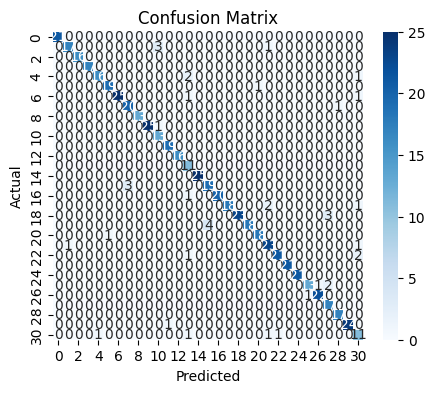

In [22]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True,fmt='d',cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [35]:
TEMP=float(input("Enter Temperature : "))
HUMIDITY=float(input("Enter Humidity : "))
PH=float(input("Enter PH : "))
RAINFALL=float(input("Enter Rainfall : "))
N=float(input("Enter Nitrogen : "))
P=float(input("Enter Phosphorus : "))
K=float(input("Enter Potassium : "))
new_data=[[TEMP,HUMIDITY,PH,RAINFALL,N,P,K]]
output=classifier.predict(new_data)
output=str(encoder.inverse_transform(output))
print("PREDICTED PLANT FOR GIVEN CONDITION IS :",output)

Enter Temperature : 45
Enter Humidity : 81
Enter PH : 8
Enter Rainfall : 263
Enter Nitrogen : 0.7
Enter Phosphorus : 0.8
Enter Potassium : 0.7
PREDICTED PLANT FOR GIVEN CONDITION IS : ['Sugarcane']


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
